# Análise exploratória de dados

In [27]:
#importar as libs
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## 1. Leitura inicial dos dados

In [28]:
#importando o conjunto de dados
df = pd.read_csv('../data/raw/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## 2. Descrição do conjunto de dados

![ilustracao vinho](../ilustracao.jpeg)

O conjunto de dados **Spanish Wine Quality Data** está relacionado a variantes de vinhos tintos espanhóis. Esses dados  descrevem várias métricas de popularidade, especificações dos vinhos e além da qualidade dos vinhos. As classes são ordenadas e não balanceadas (ou seja, a qualidade varia de quase 5 a 4 pontos). 

### 2.1 Dicionário de Dados

In [14]:
dicionario = pd.read_csv("../data/external/dictionary.csv")
dicionario

,variavel,descricao,tipo,subtipo
0,winery,Vinícola do vinho,Qualitativa,Nominal
1,wine,Nome do vinho,Qualitativa,Nominal
2,year,Ano da safra do vinho,Quantitativa,Contínua
3,rating,Avaliação do vinho (1-5),Quantitativa,Discreta
4,num_reviews,Número de avaliações,Quantitativa,Discreta
5,country,País de origem,Qualitativa,Nominal
6,region,Região de origem,Qualitativa,Nominal
7,price,Preço do vinho em euros,Quantitativa,Contínua
8,type,Tipo do vinho,Qualitativa,Nominal
9,body,Classificação do corpo do vinho (1-5),Quantitativa,Discreta


- Conjunto com 11 variáveis, com 5 qualitativas nominais, 6 quantitativas, sendo 2 contínuas e 4 discretas.

In [11]:
#informações básicas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [12]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

Valores nulos: 
- Na coluna ano apareceram 2 nulos
- Na coluna tipo foram encontrados 545 nulos
- Corpo e Acidez tem grandes quantidades de valores nulos 1169.

## 3. Perguntas de partida e hipóteses

1. **A qualidade do vinho interfere no valor dele?**
- **Hipótese**: Quanto maior for a qualidade do vinho, maior será o seu valor de mercado.
2. **A região do vinho afeta sua qualidade?**
- **Hipótese**: Vinhos produzidos em regiões renomadas possuem, em média, uma qualidade superior em comparação com vinhos de regiões menos conhecidas.
3. **Vinhos mais baratos possuem notas inferiores?**
- **Hipótese**: Vinhos com preços mais baixos tendem a receber notas de avaliação mais baixas devido à menor complexidade e qualidade percebida.
4. **O tipo de vinho interfere no valor?**
- **Hipótese**: Vinhos tintos possuem um valor de mercado superior aos vinhos brancos, em média, devido à maior demanda e ao processo de produção geralmente mais elaborado.
5. **Qual a relação entre nota, preço e ano?**
- **Hipótese**: Vinhos com notas altas e de anos mais antigos possuem preços mais elevados.
6. **Qual a relação entre tipo de vinho, nota e reviews?**
- **Hipótese**: Vinhos com notas altas e de anos mais antigos possuem preços mais elevados, pois a qualidade reconhecida e o envelhecimento contribuem para uma valorização no mercado.
7. **Qual a relação entre a região e o tipo do vinho?**
- **Hipótese**: Certas regiões são mais propensas a produzir tipos específicos de vinho devido às suas condições climáticas e de solo.
8. **Qual a relação entre a região, a acidez e o corpo do vinho?**
- **Hipótese**: Vinhos de regiões mais frias tendem a ter maior acidez e corpo mais leve, enquanto vinhos de regiões mais quentes têm menor acidez e corpo mais encorpado.

### A qualidade do vinho interfere no valor dele?

Correlação entre qualidade e valor: 0.5448089035020968


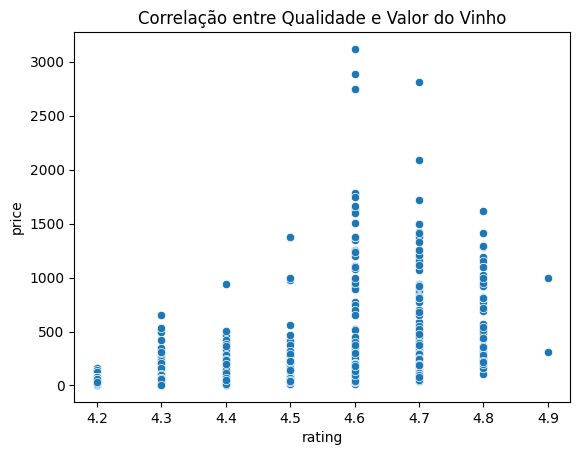

In [16]:
correlation = df['rating'].corr(df['price'])
print(f"Correlação entre qualidade e valor: {correlation}")

# Visualização da correlação
sns.scatterplot(data=df, x='rating', y='price')
plt.title('Correlação entre Qualidade e Valor do Vinho')
plt.show()

**Correlação de Pearson - Explicação**
- Esta medida é utilizada para avaliar o relacionamento linear entre duas variáveis contínuas. 
- É adequada quando os dados seguem uma distribuição normal e quando a relação entre as variáveis é linear.
- A correlação de Pearson varia de -1 a 1, onde -1 indica uma relação negativa perfeita, 0 indica ausência de correlação e 1 indica uma relação positiva perfeita.

**Análise**
- Um valor de 0.5448 indica uma correlação positiva moderada. Isso significa que, em geral, à medida que a pontuação dos vinhos aumenta, o preço também tende a aumentar.
- A correlação não implica causalidade. Embora haja uma relação entre preço e pontuação, isso não significa necessariamente que a pontuação alta causa o aumento do preço ou vice-versa. Outros fatores podem influenciar tanto o preço quanto a pontuação, como a reputação do produtor, a raridade do vinho, e preferências de mercado. Isso pode ser visto no rating 4.6, que apesar de não ser o maior score, tem preços que se destacam.

### **A região do vinho afeta sua qualidade?**

### **Vinhos mais baratos possuem notas inferiores?**

### **O tipo de vinho interfere no valor?**

In [21]:
#descrição estatística dos tipos de vinho
df.groupby('type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Albarino,252.0,18.114673,5.295559,11.900000,16.7800,16.780,16.7800,59.95
Cabernet Sauvignon,11.0,51.090000,16.426115,16.900000,45.1500,55.000,63.9150,67.45
Cava,33.0,60.547576,34.081698,7.890000,40.3300,53.700,75.5000,164.66
Chardonnay,13.0,78.114615,74.414651,15.750000,28.4000,50.900,112.7600,249.95
Grenache,35.0,57.506286,47.087446,13.950000,27.6450,36.900,80.9500,197.00
Mencia,235.0,21.244170,20.870947,17.900000,17.9000,17.900,17.9000,269.95
Monastrell,18.0,38.637778,19.707725,8.950000,28.6000,34.385,55.8675,77.98
Montsant Red,17.0,72.024118,47.386883,16.250000,36.9300,51.050,119.0000,157.95
Pedro Ximenez,35.0,148.874286,138.836991,17.500000,34.5650,114.500,216.0000,701.05


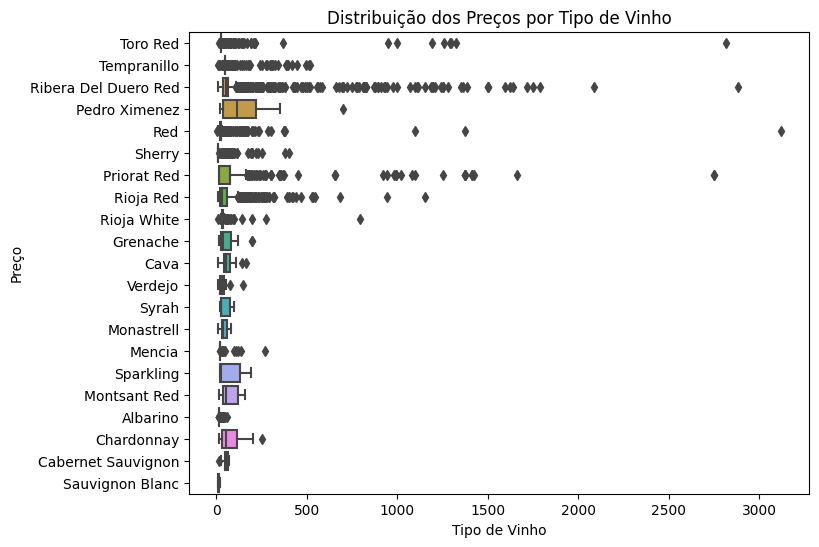

In [25]:
#figura ficou péssima****
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', y='type', data=df)
plt.title('Distribuição dos Preços por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Preço')
plt.show()

### **Qual a relação entre nota, preço e ano?**

### **Qual a relação entre tipo de vinho, nota e reviews?**

### **Qual a relação entre a região e o tipo do vinho?**

### **Qual a relação entre a região, a acidez e o corpo do vinho?**

## 3. Insights